# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df= pd.read_csv( 'spam.csv', encoding="Latin-1") #Loading Dataset

In [3]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [4]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True) #drop irrelevant features

In [5]:
df.shape

(5589, 2)

In [6]:
df.sample(5)

v1                                                 v2
5584  spam  This is the 2nd time we have tried 2 contact u...
4969   ham  We are supposed to meet to discuss abt our tri...
1341   ham  Just chill for another 6hrs. If you could slee...
494    ham                   Are you free now?can i call now?
4507   ham                           Not able to do anything.

In [7]:
df.describe()

v1                      v2
count   5589                    5589
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4840                      31

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5589 entries, 0 to 5588
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5589 non-null   object
 1   v2      5589 non-null   object
dtypes: object(2)
memory usage: 87.5+ KB


In [9]:
df.columns=['target','text']
df.head()

target                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

In [10]:
df['target']=df['target'].replace({'ham':0,'spam':1}) 

In [11]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()


420

In [14]:
df=df.drop_duplicates()


In [15]:
df.shape


(5169, 2)

# Exploratory Data Analysis

In [16]:
df['target'].value_counts()


0    4516
1     653
Name: target, dtype: int64

In [17]:
print('Real Messages Sample:')
display(df[df.target==0].head())
print('Spam Messages Sample:')
display(df[df.target==1].head())

Real Messages Sample:


target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...
6       0  Even my brother is not like to speak with me. ...

Spam Messages Sample:


target                                               text
2        1  Free entry in 2 a wkly comp to win FA Cup fina...
5        1  FreeMsg Hey there darling it's been 3 week's n...
8        1  WINNER!! As a valued network customer you have...
9        1  Had your mobile 11 months or more? U R entitle...
11       1  SIX chances to win CASH! From 100 to 20,000 po...

In [18]:
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


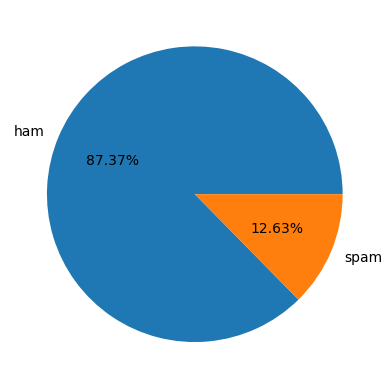

In [19]:
# Create the pie chart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f%%')
plt.show()

In [20]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['char_count']=df['text'].apply(len)
df.head()

target                                               text  char_count
0       0  Go until jurong point, crazy.. Available only ...         111
1       0                      Ok lar... Joking wif u oni...          29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...         155
3       0  U dun say so early hor... U c already then say...          49
4       0  Nah I don't think he goes to usf, he lives aro...          61

In [22]:
df['word_count']=df['text'].apply((lambda x:len(nltk.word_tokenize(x))))
df['sentence_count']=df['text'].apply((lambda x:len(nltk.sent_tokenize(x))))
df.sample(5)

target                                               text  char_count  \
4377       0      Doing nothing, then u not having dinner w us?          45   
5042       0          O ic lol. Should play 9 doors sometime yo          41   
5259       0  Can help u swoop by picking u up from wherever...          82   
4868       0  1. Tension face 2. Smiling face 3. Waste face ...         158   
1123       0                Good morning princess! How are you?          35   

      word_count  sentence_count  
4377          11               1  
5042          10               2  
5259          19               1  
4868          36               5  
1123           8               2

In [23]:
df[df['target']==0][['char_count','word_count','sentence_count']].describe()

char_count   word_count  sentence_count
count  4516.000000  4516.000000     4516.000000
mean     70.459256    17.123782        1.820195
std      56.358207    13.493970        1.383657
min       2.000000     1.000000        1.000000
25%      34.000000     8.000000        1.000000
50%      52.000000    13.000000        1.000000
75%      90.000000    22.000000        2.000000
max     910.000000   220.000000       38.000000

In [24]:
df[df['target']==1][['char_count','word_count','sentence_count']].describe()

char_count  word_count  sentence_count
count  653.000000  653.000000      653.000000
mean   137.891271   27.667688        2.970904
std     30.137753    7.008418        1.488425
min     13.000000    2.000000        1.000000
25%    132.000000   25.000000        2.000000
50%    149.000000   29.000000        3.000000
75%    157.000000   32.000000        4.000000
max    224.000000   46.000000        9.000000

<Axes: xlabel='char_count', ylabel='Count'>

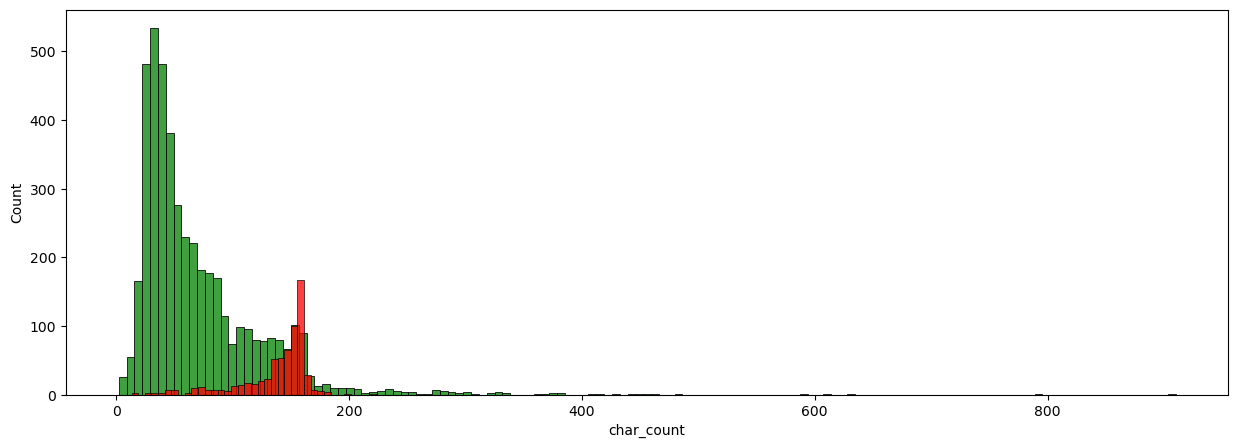

In [25]:
#plot histogram for ham and spam char_count
plt.figure(figsize=(15,5))
sns.histplot(df[df['target']==0]['char_count'],color='green')
sns.histplot(df[df['target']==1]['char_count'],color='red')

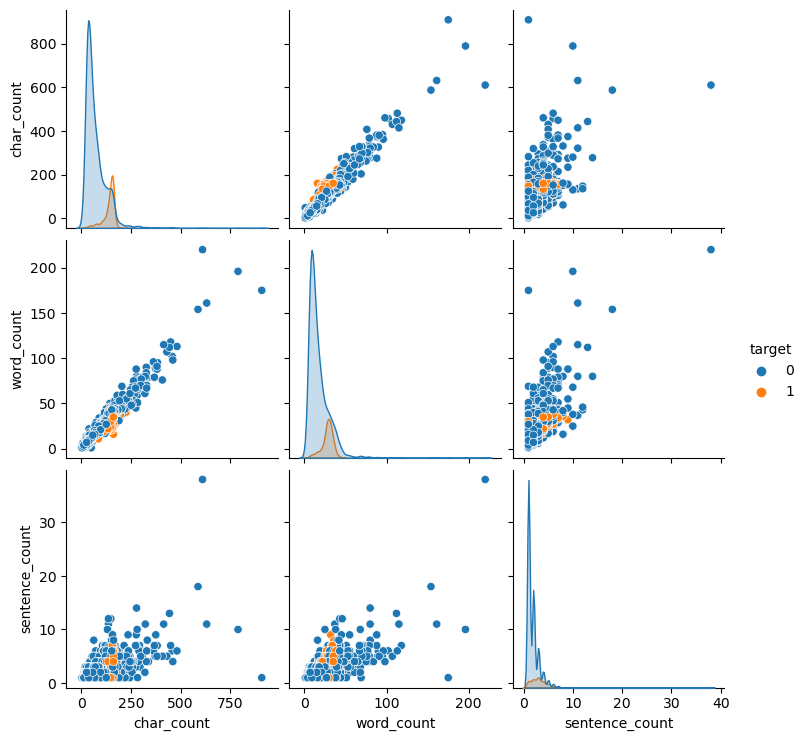

In [26]:
sns.pairplot(df,hue='target')


C:\Users\lenovo\AppData\Local\Temp\ipykernel_16232\2157429118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

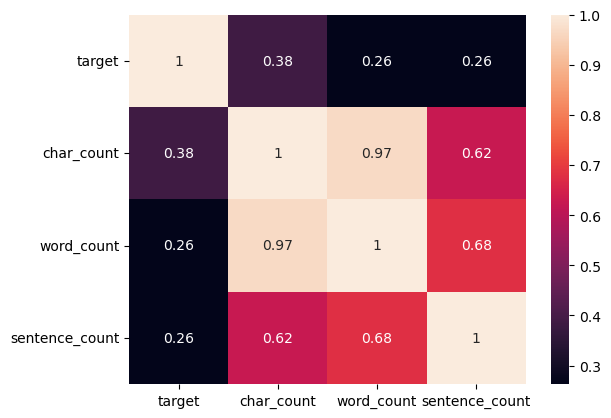

In [27]:
sns.heatmap(df.corr(),annot=True)


In [28]:
from nltk.corpus import stopwords
import string

In [29]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

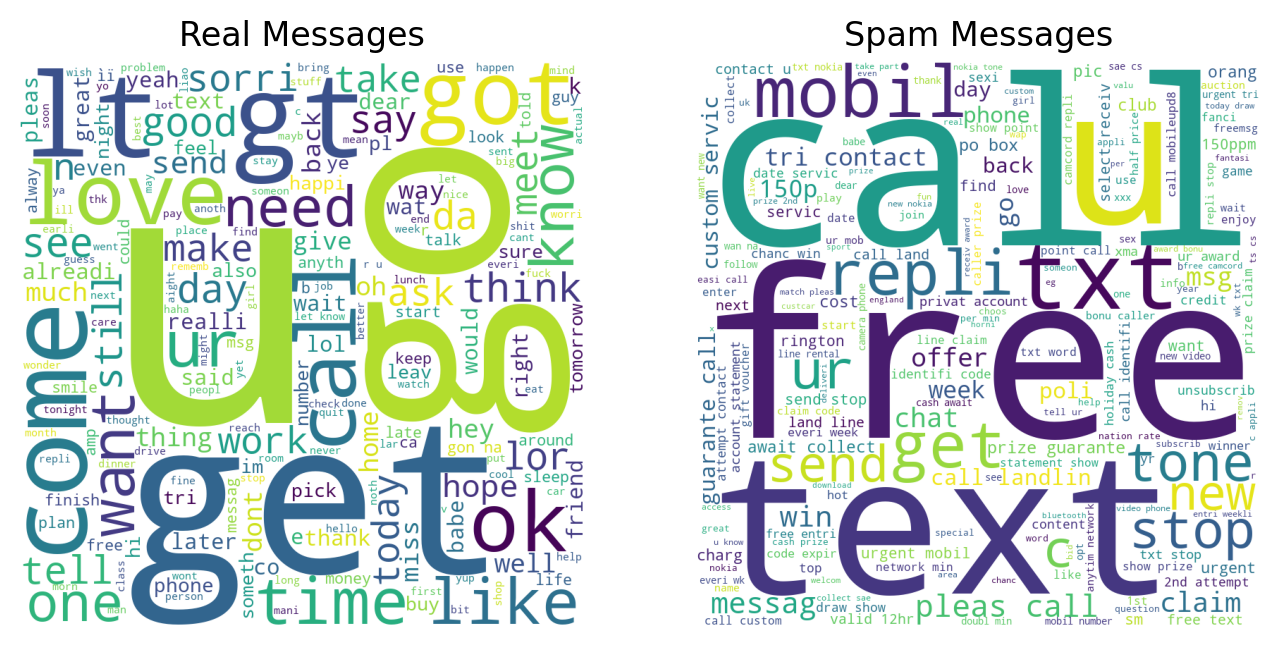

In [30]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize PorterStemmer
ps = PorterStemmer()

# Function to preprocess text
def transform_text(text):
    text = text.lower()  # Convert text to lowercase
    text = nltk.word_tokenize(text)  # Tokenization
    # Remove special characters and apply stemming
    transformed_text = []
    for token in text:
        if token.isalnum() and token not in stopwords.words('english') and token not in string.punctuation:
            transformed_text.append(ps.stem(token))
    return " ".join(transformed_text)

# Create transformed_text column by applying transform_text function to text column
df['transformed_text'] = df['text'].apply(transform_text)

# Initialize WordCloud parameters
stopwords_set = set(stopwords.words('english'))

# Create WordClouds for real and spam messages
fig, axs = plt.subplots(1, 2, figsize=(8, 8), facecolor=None, dpi=200)

for target, ax in zip([0, 1], axs):
    text_corpus = ''
    for text in df[df.target == target]['transformed_text']:
        text_corpus += text + " "
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=stopwords_set,
                          min_font_size=10).generate(text_corpus)
    ax.set_title('Real Messages' if target == 0 else 'Spam Messages')
    ax.imshow(wordcloud)
    ax.axis("off")

plt.show()


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2000)

X = vectorizer.fit_transform(df['transformed_text']).toarray()
y=df['target'].values

In [32]:
X.shape

(5169, 2000)

In [33]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [34]:
# split dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [35]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize classifiers
classifiers = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"{name}...")
    classifier.fit(X_train, y_train)
    train_accuracy = classifier.score(X_train, y_train)
    test_accuracy = classifier.score(X_test, y_test)
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Testing Accuracy: {test_accuracy:.2f}")


Gaussian Naive Bayes...
Training Accuracy: 0.88
Testing Accuracy: 0.85
Multinomial Naive Bayes...
Training Accuracy: 0.98
Testing Accuracy: 0.97
Random Forest...
Training Accuracy: 1.00
Testing Accuracy: 0.97
Logistic Regression...
Training Accuracy: 0.97
Testing Accuracy: 0.95
K-Nearest Neighbors...
Training Accuracy: 0.93
Testing Accuracy: 0.90
Support Vector Machine...
Training Accuracy: 1.00
Testing Accuracy: 0.97
Decision Tree...
Training Accuracy: 1.00
Testing Accuracy: 0.95
Gradient Boosting...
Training Accuracy: 0.98
Testing Accuracy: 0.95
XGBoost...
Training Accuracy: 0.99
Testing Accuracy: 0.96
AdaBoost...


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy: 0.97
Testing Accuracy: 0.96


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
classifiers = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}
# Train and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"{name}...")
    classifier.fit(X_train, y_train)
    y_pred_test = classifier.predict(X_test)
    
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    
    print(f"Accuracy: {test_accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")


Gaussian Naive Bayes...
Accuracy: 0.85
Precision: 0.49
Recall: 0.89
F1 Score: 0.63
Multinomial Naive Bayes...
Accuracy: 0.97
Precision: 0.99
Recall: 0.79
F1 Score: 0.88
Random Forest...
Accuracy: 0.97
Precision: 0.97
Recall: 0.78
F1 Score: 0.87
Logistic Regression...
Accuracy: 0.95
Precision: 0.97
Recall: 0.68
F1 Score: 0.80
K-Nearest Neighbors...
Accuracy: 0.90
Precision: 1.00
Recall: 0.32
F1 Score: 0.48
Support Vector Machine...
Accuracy: 0.97
Precision: 0.98
Recall: 0.79
F1 Score: 0.87
Decision Tree...
Accuracy: 0.95
Precision: 0.82
Recall: 0.80
F1 Score: 0.81
Gradient Boosting...
Accuracy: 0.95
Precision: 0.97
Recall: 0.68
F1 Score: 0.80
XGBoost...
Accuracy: 0.96
Precision: 0.92
Recall: 0.78
F1 Score: 0.84
AdaBoost...


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.96
Precision: 0.93
Recall: 0.76
F1 Score: 0.84


In [37]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install --upgrade imbalanced-learn


# SMOTE-Analysis

There is a class imbalance in the dataset. Class "0" has significantly more instances (4516 instances) compared to class "1" (653 instances).


Class distribution before SMOTE: Counter({0: 4516, 1: 653})
Class distribution after SMOTE: Counter({0: 4516, 1: 4516})


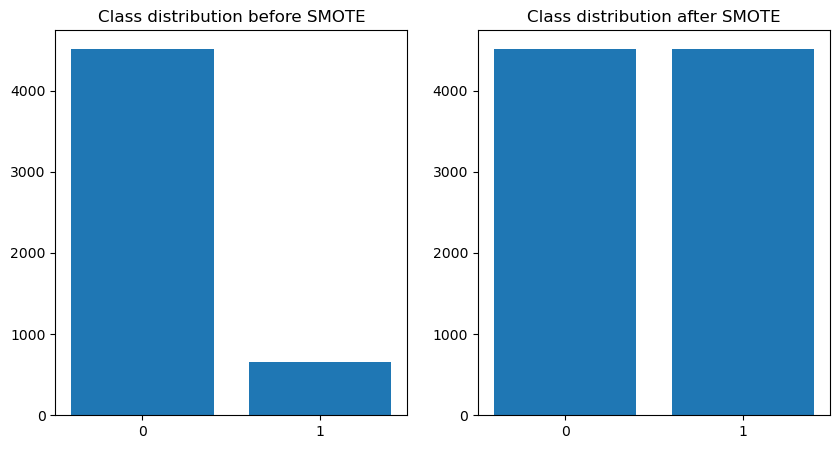

In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
import matplotlib.pyplot as plt


# Count class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y))

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))

# Plot class distribution before and after SMOTE
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(Counter(y).keys(), Counter(y).values())
axs[0].set_title('Class distribution before SMOTE')
axs[0].set_xticks([0, 1])
axs[1].bar(Counter(y_resampled).keys(), Counter(y_resampled).values())
axs[1].set_title('Class distribution after SMOTE')
axs[1].set_xticks([0, 1])
plt.show()


In [40]:
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [41]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize classifiers
classifiers = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"{name}...")
    classifier.fit(X_train, y_train)
    train_accuracy = classifier.score(X_train, y_train)
    test_accuracy = classifier.score(X_test, y_test)
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Testing Accuracy: {test_accuracy:.2f}")


Gaussian Naive Bayes...
Training Accuracy: 0.92
Testing Accuracy: 0.92
Multinomial Naive Bayes...
Training Accuracy: 0.97
Testing Accuracy: 0.97
Random Forest...
Training Accuracy: 1.00
Testing Accuracy: 0.99
Logistic Regression...
Training Accuracy: 0.95
Testing Accuracy: 0.95
K-Nearest Neighbors...
Training Accuracy: 0.66
Testing Accuracy: 0.64
Support Vector Machine...
Training Accuracy: 0.99
Testing Accuracy: 0.99
Decision Tree...
Training Accuracy: 1.00
Testing Accuracy: 0.97
Gradient Boosting...
Training Accuracy: 0.95
Testing Accuracy: 0.94
XGBoost...
Training Accuracy: 0.99
Testing Accuracy: 0.98
AdaBoost...


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy: 0.96
Testing Accuracy: 0.95


In [42]:
# Assume new_input_text contains the input text to be classified
new_input_text = "Hello, you've won a prize! Click here to claim."

# Preprocess the input text (e.g., vectorize it)
new_input_vectorized = vectorizer.transform([new_input_text])

# Use the trained Logistic Regression classifier to predict the label
predicted_label = classifiers['Logistic Regression'].predict(new_input_vectorized)[0]

# Interpret the predicted label
if predicted_label == 1:
    print("The input text is classified as SPAM.")
else:
    print("The input text is classified as NOT SPAM.")


The input text is classified as SPAM.


In [43]:
# Assume new_input_text contains the input text to be classified
new_input_text = "Hello, How are you."

# Preprocess the input text (e.g., vectorize it)
new_input_vectorized = vectorizer.transform([new_input_text])

# Use the trained Logistic Regression classifier to predict the label
predicted_label = classifiers['Logistic Regression'].predict(new_input_vectorized)[0]

# Interpret the predicted label
if predicted_label == 1:
    print("The input text is classified as SPAM.")
else:
    print("The input text is classified as NOT SPAM.")


The input text is classified as NOT SPAM.


In [44]:
import pickle

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


# RF is one of the top performing model for this dataset

In [45]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Save the Random Forest classifier using pickle
with open('random_forest.pkl', 'wb') as f:
    pickle.dump(random_forest, f)


In [46]:
from lime import lime_text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

# Sample data (replace with your actual data)
# Assuming df is your DataFrame with 'clean_tweet' column and 'label' column
texts = df['transformed_text'].tolist()
labels = df['target'].tolist()

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Create a classifier (replace with your actual model)
classifier = make_pipeline(vectorizer, RandomForestClassifier())
classifier.fit(texts, labels)

# Create the LIME explainer
explainer = lime_text.LimeTextExplainer()

# Select an instance for which you want to explain the prediction
instance_idx = 1819
instance = texts[instance_idx]

# Explain the prediction using LIME
explanation = explainer.explain_instance(instance, classifier.predict_proba)

# Visualize the explanation
explanation.show_in_notebook(text=True)


In [47]:
from lime import lime_text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

# Sample data (replace with your actual data)
# Assuming df is your DataFrame with 'clean_tweet' column and 'label' column
texts = df['transformed_text'].tolist()
labels = df['target'].tolist()

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Create a classifier (replace with your actual model)
classifier = make_pipeline(vectorizer, RandomForestClassifier())
classifier.fit(texts, labels)

# Create the LIME explainer
explainer = lime_text.LimeTextExplainer()

# Select an instance for which you want to explain the prediction
instance_idx = 203
instance = texts[instance_idx]

# Explain the prediction using LIME
explanation = explainer.explain_instance(instance, classifier.predict_proba)

# Visualize the explanation
explanation.show_in_notebook(text=True)


In [48]:
texts = df['transformed_text'].tolist()
labels = df['target'].tolist()

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Create a classifier (replace with your actual model)
classifier = make_pipeline(vectorizer, RandomForestClassifier())
classifier.fit(texts, labels)

# Create the LIME explainer
explainer = lime_text.LimeTextExplainer()

# Select an instance for which you want to explain the prediction
instance_idx = 4875
instance = texts[instance_idx]

# Explain the prediction using LIME
explanation = explainer.explain_instance(instance, classifier.predict_proba)

# Visualize the explanation
explanation.show_in_notebook(text=True)

In [49]:
texts = df['transformed_text'].tolist()
labels = df['target'].tolist()

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Create a classifier (replace with your actual model)
classifier = make_pipeline(vectorizer, RandomForestClassifier())
classifier.fit(texts, labels)

# Create the LIME explainer
explainer = lime_text.LimeTextExplainer()

# Select an instance for which you want to explain the prediction
instance_idx = 2
instance = texts[instance_idx]

# Explain the prediction using LIME
explanation = explainer.explain_instance(instance, classifier.predict_proba)

# Visualize the explanation
explanation.show_in_notebook(text=True)

In [50]:
texts = df['transformed_text'].tolist()
labels = df['target'].tolist()

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Create a classifier (replace with your actual model)
classifier = make_pipeline(vectorizer, RandomForestClassifier())
classifier.fit(texts, labels)

# Create the LIME explainer
explainer = lime_text.LimeTextExplainer()

# Select an instance for which you want to explain the prediction
instance_idx = 9
instance = texts[instance_idx]

# Explain the prediction using LIME
explanation = explainer.explain_instance(instance, classifier.predict_proba)

# Visualize the explanation
explanation.show_in_notebook(text=True)